In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **MDVP Extract Features**

In [188]:
!pip install praat-parselmouth

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [189]:
import parselmouth
import glob
import numpy as np
import pandas as pd

def measureVoice(voiceID):
  sound = parselmouth.Sound(voiceID)

  pitch = sound.to_pitch()
  fo = parselmouth.praat.call(pitch, "Get mean", 0, 0, "Hertz")
  fhi = parselmouth.praat.call(pitch, "Get maximum", 0, 0, "Hertz", "Parabolic")
  flo = parselmouth.praat.call(pitch, "Get minimum", 0, 0, "Hertz", "Parabolic")

  point_process = parselmouth.praat.call([sound, pitch], "To PointProcess (cc)")

  jitter_local = parselmouth.praat.call(point_process, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
  jitter_abs = parselmouth.praat.call(point_process, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
  jitter_rap = parselmouth.praat.call(point_process, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
  jitter_ppq = parselmouth.praat.call(point_process, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
  jitter_ddp = parselmouth.praat.call(point_process, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
  shimmer_local = parselmouth.praat.call([sound, point_process], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
  shimmer_dB = parselmouth.praat.call([sound, point_process], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
  shimmer_apq3 = parselmouth.praat.call([sound, point_process], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
  shimmer_apq5 = parselmouth.praat.call([sound, point_process], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
  shimmer_dda = parselmouth.praat.call([sound, point_process], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

  harmonicity = sound.to_harmonicity()
  hnr = parselmouth.praat.call(harmonicity, "Get mean", 0, 0)

  noise_start = sound.extract_part(0, 0.5, preserve_times=True, window_shape=parselmouth.WindowShape.RECTANGULAR)
  noise_end = sound.extract_part(9.5, 10, preserve_times=True, window_shape=parselmouth.WindowShape.RECTANGULAR)
  noise_energy = noise_start.get_energy() + noise_end.get_energy()
  signal_energy = sound.get_energy()
  nhr = noise_energy / signal_energy

  apq = parselmouth.praat.call([sound, point_process], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

  return fo, fhi, flo, jitter_local, jitter_abs, jitter_rap, jitter_ppq, jitter_ddp, shimmer_local, shimmer_dB, shimmer_apq3, shimmer_apq5, shimmer_dda, hnr, nhr, apq

def extractFeatures(soundFiles, filename, status):
  file_lists = []
  fo_lists = []
  fhi_lists = []
  flo_lists = []
  jitter_local_lists = []
  jitter_abs_lists = []
  jitter_rap_lists = []
  jitter_ppq_lists = []
  jitter_ddp_lists = []
  shimmer_local_lists = []
  shimmer_dB_lists = []
  shimmer_apq3_lists = []
  shimmer_apq5_lists = []
  shimmer_dda_lists = []
  hnr_lists = []
  nhr_lists = []
  apq_lists = []
  status_lists = []

  for soundFile in glob.glob(soundFiles):
      sound = parselmouth.Sound(soundFile)
      (fo, fhi, flo, jitter_local, jitter_abs, jitter_rap, jitter_ppq, jitter_ddp, shimmer_local, shimmer_dB, shimmer_apq3, shimmer_apq5, shimmer_dda, hnr, nhr, apq) = measureVoice(sound)

      file_lists.append(soundFile)
      fo_lists.append(fo)
      fhi_lists.append(fhi)
      flo_lists.append(flo)
      jitter_local_lists.append(jitter_local)
      jitter_abs_lists.append(jitter_abs)
      jitter_rap_lists.append(jitter_rap)
      jitter_ppq_lists.append(jitter_ppq)
      jitter_ddp_lists.append(jitter_ddp)
      shimmer_local_lists.append(shimmer_local)
      shimmer_dB_lists.append(shimmer_dB)
      shimmer_apq3_lists.append(shimmer_apq3)
      shimmer_apq5_lists.append(shimmer_apq5)
      shimmer_dda_lists.append(shimmer_dda)
      hnr_lists.append(hnr)
      nhr_lists.append(nhr)
      apq_lists.append(apq)
      status_lists.append(status)


  df = pd.DataFrame(np.column_stack([file_lists, fo_lists, fhi_lists, flo_lists, jitter_local_lists, jitter_abs_lists, jitter_rap_lists, jitter_ppq_lists, jitter_ddp_lists, shimmer_local_lists, shimmer_dB_lists, shimmer_apq3_lists, shimmer_apq5_lists, shimmer_dda_lists, hnr_lists, nhr_lists, apq_lists, status_lists]),
                    columns=['voice', 'MDVP:Fo (Hz)','MDVP:Fhi (Hz)','MDVP:Flo (Hz)','MDVP:Jitter (%)','MDVP:Jitter (Abs)','Jitter:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer (dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA','NHR','HNR','MDVP:APQ','status'])

  df.to_csv(filename, index=False)

Extract Healthy

In [ ]:
healthy_source = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/healthy/*"
healthy_output = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/healthy.csv"

extractFeatures(healthy_source, healthy_output, 0);

Extract Feature Nodule

In [ ]:
nodule_source = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/nodule/*"
nodule_output = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/nodule.csv"

extractFeatures(nodule_source, nodule_output, 1);

Extract Feature Polyps

In [ ]:
polyps_source = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/polyps/*"
polyps_output = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/polyps.csv"

extractFeatures(polyps_source, polyps_output, 2);

Extract Feature Reinke's Edema


In [ ]:
reinke_edema_source = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/reinke's edema/*"
reinke_edema_output = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/reinkes_edema.csv"

extractFeatures(reinke_edema_source, reinke_edema_output, 3);

Extract Feature Paralysis

In [ ]:
paralysis_source = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/paralysis/*"
paralysis_output = "/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/paralysis.csv"

extractFeatures(paralysis_source, paralysis_output, 4);

# **Classifications**

Load and Prepare Data


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split

healthy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/healthy.csv')
nodule = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/nodule.csv')
polyp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/polyps.csv')
reinkes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/reinkes_edema.csv')
paralysis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clasification Pathology/Dataset/paralysis.csv')

data = pd.concat([healthy, nodule, polyp, reinkes, paralysis], ignore_index=True)

features = data.drop(['voice', 'status'], axis=1)
labels = data['status']

labelClasses = ["Healthy", "Nodule", "Polyps", "Reinke's Edema", "Paralysis"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=47)

In [ ]:
print("Train Dataset:", len(X_train))
print("Test Dataset:", len(X_test))

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support


def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=_cv,
                             scoring=_scoring,
                             return_train_score=True)

    # Menyesuaikan argumen average dan zero_division
    precision, recall, f1, _ = precision_recall_fscore_support(_y, model.predict(_X), average='weighted')

    return {
        "Training Accuracy scores": results['train_accuracy'],
        "Mean Training Accuracy": results['train_accuracy'].mean() * 100,
        "Training Precision scores": precision,
        "Mean Training Precision": precision,
        "Training Recall scores": recall,
        "Mean Training Recall": recall,
        "Training F1 scores": f1,
        "Mean Training F1 Score": f1,
        "Validation Accuracy scores": results['test_accuracy'],
        "Mean Validation Accuracy": results['test_accuracy'].mean() * 100,
        "Validation Precision scores": results['test_precision_weighted'],
        "Mean Validation Precision": results['test_precision_weighted'].mean(),
        "Validation Recall scores": results['test_recall_weighted'],
        "Mean Validation Recall": results['test_recall_weighted'].mean(),
        "Validation F1 scores": results['test_f1_weighted'],
        "Mean Validation F1 Score": results['test_f1_weighted'].mean()
    }

**XGBoost**

In [154]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import numpy as np

xgb_first_model = XGBClassifier(objective="multi:softmax", n_estimators=100, eval_metric=["auc", "merror", "mlogloss"], random_state=5)
xgb_first_model.fit(X_train, y_train, eval_set=[( X_test, y_test)], verbose=10)

param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.001, 0.01, 0.1],
    # 'min_child_weight': [1, 10, 100]
}

grid_search = GridSearchCV(estimator=xgb_first_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=10)
grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
print(f'Best Hyperparameters: {best_estimator}')

[0]	validation_0-auc:0.83092	validation_0-merror:0.42373	validation_0-mlogloss:1.37012
[10]	validation_0-auc:0.88188	validation_0-merror:0.35593	validation_0-mlogloss:0.98871
[20]	validation_0-auc:0.88262	validation_0-merror:0.37288	validation_0-mlogloss:1.05470
[30]	validation_0-auc:0.88039	validation_0-merror:0.35593	validation_0-mlogloss:1.09373
[40]	validation_0-auc:0.88204	validation_0-merror:0.37288	validation_0-mlogloss:1.13067
[50]	validation_0-auc:0.88193	validation_0-merror:0.37288	validation_0-mlogloss:1.16698
[60]	validation_0-auc:0.88089	validation_0-merror:0.37288	validation_0-mlogloss:1.19233
[70]	validation_0-auc:0.88054	validation_0-merror:0.37288	validation_0-mlogloss:1.21058
[80]	validation_0-auc:0.88078	validation_0-merror:0.37288	validation_0-mlogloss:1.23141
[90]	validation_0-auc:0.88043	validation_0-merror:0.37288	validation_0-mlogloss:1.24819
[99]	validation_0-auc:0.87878	validation_0-merror:0.37288	validation_0-mlogloss:1.25467
Fitting 3 folds for each of 27 ca

In [155]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

xgb_model = best_estimator
xgb_model.fit(X_train, y_train, eval_set=[( X_test, y_test)], verbose=5)

xgb_predict_labels = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predict_labels)
print(f'Accuracy: {xgb_accuracy:.2f}')

print('Report:\n', classification_report(y_test, xgb_predict_labels))

xgb_model.save_model('xgboost_model.json')

[0]	validation_0-auc:0.80506	validation_0-merror:0.33898	validation_0-mlogloss:1.51960
[5]	validation_0-auc:0.84235	validation_0-merror:0.38983	validation_0-mlogloss:1.25306
[10]	validation_0-auc:0.85031	validation_0-merror:0.38983	validation_0-mlogloss:1.12415
[15]	validation_0-auc:0.85559	validation_0-merror:0.37288	validation_0-mlogloss:1.07287
[20]	validation_0-auc:0.85101	validation_0-merror:0.38983	validation_0-mlogloss:1.06747
[25]	validation_0-auc:0.84917	validation_0-merror:0.38983	validation_0-mlogloss:1.06947
[30]	validation_0-auc:0.85290	validation_0-merror:0.40678	validation_0-mlogloss:1.06973
[35]	validation_0-auc:0.85432	validation_0-merror:0.40678	validation_0-mlogloss:1.08497
[40]	validation_0-auc:0.85571	validation_0-merror:0.40678	validation_0-mlogloss:1.09786
[45]	validation_0-auc:0.85863	validation_0-merror:0.40678	validation_0-mlogloss:1.10882
[50]	validation_0-auc:0.85786	validation_0-merror:0.40678	validation_0-mlogloss:1.12034
[55]	validation_0-auc:0.85898	vali

In [187]:

predictions_proba = xgb_model.predict_proba(X_test)

threshold = 0.7
for idx, probas in enumerate(predictions_proba):
    max_prob = max(probas)
    if max_prob < threshold:
        print(f"The voice is not recognized with confidence {max_prob}.")
    else:
        pred_label = np.argmax(probas)
        print(f"Sounds are classified as {labelClasses[pred_label]} with confidence {max_prob}.")

predictions = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Akurasi: {accuracy}")

Sounds are classified as Healthy with confidence 0.9894590377807617.
Sounds are classified as Paralysis with confidence 0.9983121156692505.
Sounds are classified as Nodule with confidence 0.8809617757797241.
Sounds are classified as Reinke's Edema with confidence 0.9311599731445312.
Sounds are classified as Healthy with confidence 0.9692966341972351.
Sounds are classified as Healthy with confidence 0.9753153324127197.
Sounds are classified as Paralysis with confidence 0.8893008828163147.
Sounds are classified as Reinke's Edema with confidence 0.96187424659729.
Sounds are classified as Reinke's Edema with confidence 0.894669771194458.
The voice is not recognized with confidence 0.42108237743377686.
Sounds are classified as Paralysis with confidence 0.9979918003082275.
Sounds are classified as Paralysis with confidence 0.9099161624908447.
Sounds are classified as Paralysis with confidence 0.992902934551239.
Sounds are classified as Reinke's Edema with confidence 0.8400145769119263.
Sound

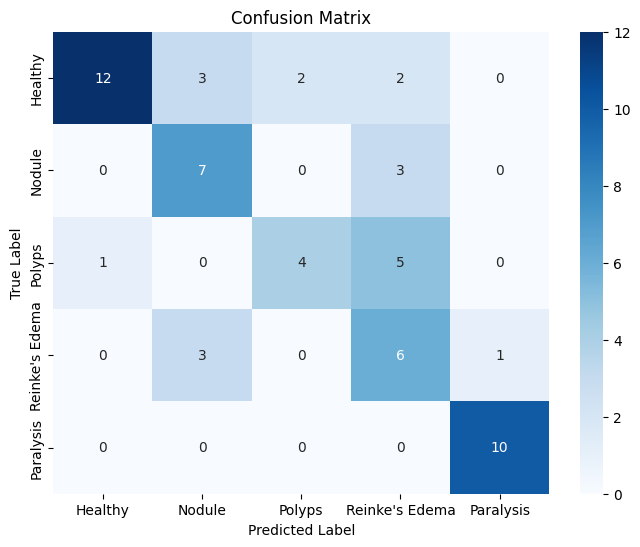

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Training Accuracy scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': 0.7191636047568252,
 'Mean Training Precision': 0.7191636047568252,
 'Training Recall scores': 0.6610169491525424,
 'Mean Training Recall': 0.6610169491525424,
 'Training F1 scores': 0.669087299337852,
 'Mean Training F1 Score': 0.669087299337852,
 'Validation Accuracy scores': array([0.91666667, 0.41666667, 0.41666667, 0.58333333, 0.63636364]),
 'Mean Validation Accuracy': 59.3939393939394,
 'Validation Precision scores': array([0.94444444, 0.36111111, 0.38333333, 0.52380952, 0.59090909]),
 'Mean Validation Precision': 0.5607215007215006,
 'Validation Recall scores': array([0.91666667, 0.41666667, 0.41666667, 0.58333333, 0.63636364]),
 'Mean Validation Recall': 0.593939393939394,
 'Validation F1 scores': array([0.91111111, 0.37857143, 0.39814815, 0.52020202, 0.60606061]),
 'Mean Validation F1 Score': 0.5628186628186628}

In [158]:
conf_matrix = confusion_matrix(y_test, xgb_predict_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelClasses, yticklabels=labelClasses)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

xgb_df = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':xgb_predict_labels})

xgb_model.save_model('xgboost_model.json')

xgb_model.load_model('xgboost_model.json')

xgb_result = cross_validation(xgb_model, X_test, y_test, 5)
xgb_result


**RandomForest**

RF Accuracy: 0.6440677966101694


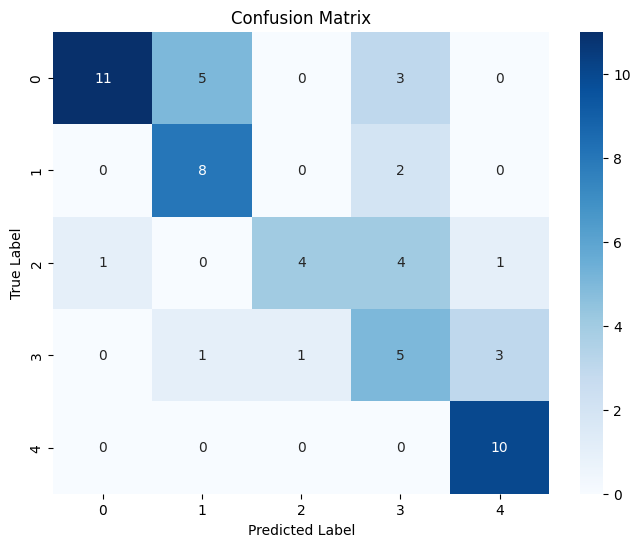

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Training Accuracy scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': 0.7092413236481033,
 'Mean Training Precision': 0.7092413236481033,
 'Training Recall scores': 0.6440677966101694,
 'Mean Training Recall': 0.6440677966101694,
 'Training F1 scores': 0.6437944231820667,
 'Mean Training F1 Score': 0.6437944231820667,
 'Validation Accuracy scores': array([0.58333333, 0.58333333, 0.5       , 0.66666667, 0.72727273]),
 'Mean Validation Accuracy': 61.212121212121204,
 'Validation Precision scores': array([0.57222222, 0.58333333, 0.44444444, 0.61111111, 0.78787879]),
 'Mean Validation Precision': 0.5997979797979799,
 'Validation Recall scores': array([0.58333333, 0.58333333, 0.5       , 0.66666667, 0.72727273]),
 'Mean Validation Recall': 0.6121212121212121,
 'Validation F1 scores': array([0.55740741, 0.58333333, 0.46666667, 0.61111111, 0.74545455]),
 'Mean Validation F1 Score': 0.5927946127946127}

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score

# Create and fit the Random Forest model
rfmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfmodel.fit(X_train, y_train)

# Predictions
y_pred = rfmodel.predict(X_test)

# Evaluate accuracy
rf_accuracy = metrics.accuracy_score(y_test, y_pred)
print("RF Accuracy:", rf_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelClasses, yticklabels=labelClasses)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Cross-validation
rfscore = cross_validation(rfmodel, X_test, y_test)
rfscore


**SVM**

Accuracy: 0.576271186440678


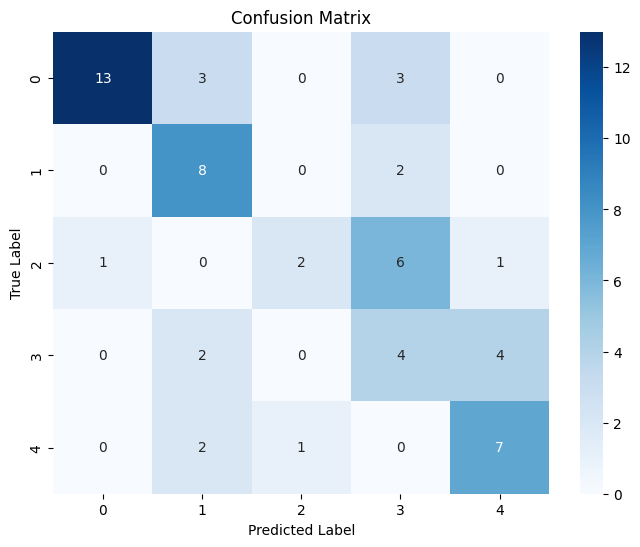

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

{'Training Accuracy scores': array([0.68085106, 0.68085106, 0.61702128, 0.72340426, 0.625     ]),
 'Mean Training Accuracy': 66.54255319148936,
 'Training Precision scores': 0.6464891041162227,
 'Mean Training Precision': 0.6464891041162227,
 'Training Recall scores': 0.576271186440678,
 'Mean Training Recall': 0.576271186440678,
 'Training F1 scores': 0.5764450239026511,
 'Mean Training F1 Score': 0.5764450239026511,
 'Validation Accuracy scores': array([0.58333333, 0.41666667, 0.5       , 0.58333333, 0.54545455]),
 'Mean Validation Accuracy': 52.57575757575758,
 'Validation Precision scores': array([0.44047619, 0.29166667, 0.39880952, 0.38888889, 0.4969697 ]),
 'Mean Validation Precision': 0.40336219336219337,
 'Validation Recall scores': array([0.58333333, 0.41666667, 0.5       , 0.58333333, 0.54545455]),
 'Mean Validation Recall': 0.5257575757575758,
 'Validation F1 scores': array([0.46464646, 0.33888889, 0.40909091, 0.46111111, 0.48939394]),
 'Mean Validation F1 Score': 0.43262626

In [160]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Create and fit the SVM model
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

# Predictions
y_pr = clf.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, y_pr)
print("Accuracy:", svm_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pr)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelClasses, yticklabels=labelClasses)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Cross-validation
svmscore = cross_validation(clf, X_test, y_test)
svmscore

**ANN**

Epoch 1/25
47/47 [==============================] - 1s 3ms/step - loss: 1.6093 - accuracy: 0.2103
Epoch 2/25
47/47 [==============================] - 0s 3ms/step - loss: 1.6051 - accuracy: 0.2532
Epoch 3/25
47/47 [==============================] - 0s 3ms/step - loss: 1.5901 - accuracy: 0.2532
Epoch 4/25
47/47 [==============================] - 0s 2ms/step - loss: 1.5699 - accuracy: 0.2532
Epoch 5/25
47/47 [==============================] - 0s 3ms/step - loss: 1.5462 - accuracy: 0.2790
Epoch 6/25
47/47 [==============================] - 0s 2ms/step - loss: 1.5117 - accuracy: 0.3348
Epoch 7/25
47/47 [==============================] - 0s 2ms/step - loss: 1.4758 - accuracy: 0.3348
Epoch 8/25
47/47 [==============================] - 0s 2ms/step - loss: 1.4561 - accuracy: 0.3305
Epoch 9/25
47/47 [==============================] - 0s 2ms/step - loss: 1.4278 - accuracy: 0.3648
Epoch 10/25
47/47 [==============================] - 0s 3ms/step - loss: 1.4223 - accuracy: 0.3605
Epoch 11/25
47/47 [

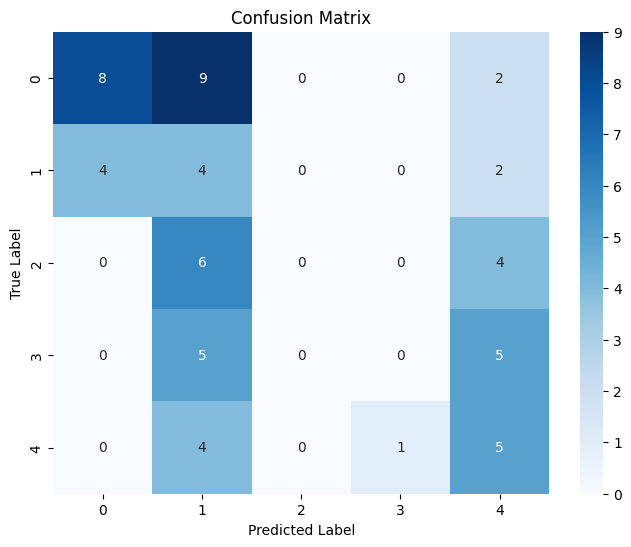

In [161]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.utils import to_categorical
from sklearn import metrics

classifier = Sequential()
classifier.add(Dense(units=8, input_dim=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=7, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))  # Use softmax for multi-class
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='softmax'))  # Output layer with softmax

# Use categorical_crossentropy for multi-class classification
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
classifier.fit(X_train, to_categorical(y_train, num_classes=5), batch_size=5, epochs=25, verbose=1)

# Predictions
ann_prediction = classifier.predict(X_test)
y_ann_pre = np.argmax(ann_prediction, axis=1)  # Convert softmax output to class labels

ann_df = pd.DataFrame({'y_Actual': y_test, 'y_Predicted': y_ann_pre})

# Accuracy
ann_accuracy = accuracy_score(ann_df['y_Actual'].tolist(), ann_df['y_Predicted'].tolist())
print("ANN Accuracy:", ann_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_ann_pre)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelClasses, yticklabels=labelClasses)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Evaluation**

In [162]:
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')
print(f'RF Accuracy: {rf_accuracy:.2f}')
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'ANN Accuracy: {ann_accuracy:.2f}')

XGBoost Accuracy: 0.66
RF Accuracy: 0.64
SVM Accuracy: 0.58
ANN Accuracy: 0.29


In [163]:
import plotly.express as px

acc_df = pd.DataFrame({'method':['XGB',
                                'RF',
                                'SVM',
                                'ANN'],
                       'Acc':[xgb_accuracy, rf_accuracy, svm_accuracy, ann_accuracy]})
fig = px.line(acc_df, x="method", y="Acc", title='Accuracy of Models')
fig.show()

In [173]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def draw_confusionx(df, method='randomforest'):
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.to_numpy().flatten()]
    group_percentages = ["{0:.2f}".format(value) for value in (confusion_matrix/np.sum(confusion_matrix)).to_numpy().flatten()]
    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(4,4)
    ax = sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
#     plt.title('the Confusion Maxtrix of the {}'.format(config['method']))
    plt.savefig('{}_confusion_matrix.pdf'.format(method), bbox_inches = 'tight')
    return plt

def roc_auc_mean_std(df):
    y_test = label_binarize(df['y_Actual'], classes=np.unique(df['y_Actual']))
    y_pred = df['y_Predicted'].tolist()

    n_classes = y_test.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    aucs = []
    tprs = []
    fprs = []

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        tprs.append(tpr[i])
        fprs.append(fpr[i])
        aucs.append(roc_auc[i])

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_fpr = np.mean(fprs, axis=0)
    mean_fpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    return mean_fpr, mean_tpr, mean_auc, std_auc

In [ ]:
plt.figure()
lw = 2
alpha = 0.9

# roc_xgb_df, roc_randf_df, roc_svm_df, roc_ann_df
#xgb_df, rf_df, svm_df, ann_df

mean_fpr, mean_tpr, mean_auc, std_auc = roc_auc_mean_std(xgb_df)
plt.plot(mean_fpr,
         mean_tpr,
         label=r"XGBoost (AUC = %0.2f )" %(mean_auc),
         color="navy",
         lw=lw,
         alpha=1)

mean_fpr, mean_tpr, mean_auc, std_auc = roc_auc_mean_std(rf_df)
plt.plot(mean_fpr,
         mean_tpr,
         label=r"Random Forest (AUC = %0.2f)" %(mean_auc),
         color="deeppink",
         lw=lw,
         alpha=1)


mean_fpr, mean_tpr, mean_auc, std_auc = roc_auc_mean_std(svm_df)
plt.plot(mean_fpr,
         mean_tpr,
         label=r"SVM (AUC = %0.2f)" %(mean_auc),
         color="aqua",
         lw=lw,
         alpha=0.8)

mean_fpr, mean_tpr, mean_auc, std_auc = roc_auc_mean_std(ann_df)
plt.plot(mean_fpr,
         mean_tpr,
         label=r"ANN (AUC = %0.2f)" %(mean_auc),
         color="darkorange",
         lw=lw,
         alpha=alpha)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

plt.xlabel("1-Specificity", fontsize=14)
plt.ylabel("Sensitivity", fontsize=14)


plt.legend(loc="lower right", prop={'size': 14})

# plt.savefig('roc_curve.png', dpi=1000, bbox_inches = 'tight')
plt.show()